## Tensorflow Intro

<a target="_blank" href="https://colab.research.google.com/github/Aleksis99/Artificial-Intelligence/blob/main/11_Tensorflow_Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

In [2]:
# Load dataset
data = load_wine()

In [3]:
# Convert to pandas dataframe just to have it in nice tabular format to explore it more clearly.
df = pd.DataFrame(
    data=np.c_[data["data"], data["target"]], columns=data["feature_names"] + ["target"]
)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
df.shape, df.target.value_counts()

((178, 14),
 target
 1.0    71
 0.0    59
 2.0    48
 Name: count, dtype: int64)

In [5]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 13), (59, 13), (119,), (59,))

#### Let's normalize the data

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

### Now we will define our neural network tf.Variable allows us to create an n dimensional tensor and with tf.GradientTape we can keep track of the operations on the tensors and then calculate their gradient. Cross entropy is an error function that considers how close two distributions are. We can use it for classification with more than two classes. SparseCategoricalCrossentropy does not require us to do one-hot encoding of the classes.

In [7]:
g = tf.random.Generator.from_seed(1234)
W1 = tf.Variable(g.normal(shape=[13, 50], dtype="float32"))
b1 = tf.Variable(g.normal(shape=[50], dtype="float32"))
W2 = tf.Variable(g.normal(shape=[50, 3], dtype="float32"))
b2 = tf.Variable(g.normal(shape=[3], dtype="float32"))
parameters = [W1, b1, W2, b2]

In [8]:
sum(
    tf.size(p) for p in parameters
).numpy()  # number of parameters in total = 13*50+50*3+50+3

853

In [9]:
# formula
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.compat.v1.enable_eager_execution()  # makes execution eager

with tf.GradientTape() as tape:
    tape.watch(W1)
    tape.watch(W2)
    tape.watch(b1)
    tape.watch(b2)
    h = X_train @ W1 + b1
    logits = h @ W2 + b2
    loss = loss_fn(y_train, logits)

    [dl_dW1, dl_db1, dl_dW2, dl_db2] = tape.gradient(loss, [W1, b1, W2, b2])

W1.assign_add(-0.1 * dl_dW1)
b1.assign_add(-0.1 * dl_db1)
W2.assign_add(-0.1 * dl_dW2)
b2.assign_add(-0.1 * dl_db2)

print(loss)

tf.Tensor(22.837023, shape=(), dtype=float32)


In [10]:
# inference

h = X_test @ W1 + b1
logits = h @ W2 + b2

correctly = (tf.math.argmax(logits, axis=1).numpy() == y_test).sum()
accuracy = correctly / len(y_test)
print(accuracy)

0.6440677966101694


In [11]:
# formula
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.compat.v1.enable_eager_execution()
epochs = 50
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        tape.watch(W1)
        tape.watch(W2)
        tape.watch(b1)
        tape.watch(b2)
        h = tf.math.tanh(X_train @ W1 + b1)
        logits = h @ W2 + b2
        probs = logits
        # print(probs)
        loss = loss_fn(y_train, probs)

        [dl_dW1, dl_db1, dl_dW2, dl_db2] = tape.gradient(loss, [W1, b1, W2, b2])

        W1.assign_add(-0.1 * dl_dW1)
        b1.assign_add(-0.1 * dl_db1)
        W2.assign_add(-0.1 * dl_dW2)
        b2.assign_add(-0.1 * dl_db2)

    print(loss)

tf.Tensor(1.8015751, shape=(), dtype=float32)
tf.Tensor(1.5843841, shape=(), dtype=float32)
tf.Tensor(1.4033997, shape=(), dtype=float32)
tf.Tensor(1.2505901, shape=(), dtype=float32)
tf.Tensor(1.1214095, shape=(), dtype=float32)
tf.Tensor(1.0122123, shape=(), dtype=float32)
tf.Tensor(0.9194433, shape=(), dtype=float32)
tf.Tensor(0.83970815, shape=(), dtype=float32)
tf.Tensor(0.7701422, shape=(), dtype=float32)
tf.Tensor(0.70865005, shape=(), dtype=float32)
tf.Tensor(0.65378803, shape=(), dtype=float32)
tf.Tensor(0.60451376, shape=(), dtype=float32)
tf.Tensor(0.5600232, shape=(), dtype=float32)
tf.Tensor(0.5196966, shape=(), dtype=float32)
tf.Tensor(0.48308235, shape=(), dtype=float32)
tf.Tensor(0.4498588, shape=(), dtype=float32)
tf.Tensor(0.4197663, shape=(), dtype=float32)
tf.Tensor(0.39254194, shape=(), dtype=float32)
tf.Tensor(0.36788735, shape=(), dtype=float32)
tf.Tensor(0.3454789, shape=(), dtype=float32)
tf.Tensor(0.32500103, shape=(), dtype=float32)
tf.Tensor(0.30617562, shap

In [12]:
dl_dW1.shape

TensorShape([13, 50])

In [13]:
# inference

h = tf.math.tanh(X_test @ W1 + b1)
logits = h @ W2 + b2

correctly = (tf.math.argmax(logits, axis=1).numpy() == y_test).sum()
accuracy = correctly / len(y_test)
print(accuracy)

0.9830508474576272


In [14]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

In [15]:
import random
from IPython import display
from matplotlib import pyplot as plt

In [16]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    set_default()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis("square")
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True:
        plt.axis("equal")
    plt.axis("off")

    _m, _c = 0, ".15"
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)

    data = tf.convert_to_tensor(np.vstack((xx.reshape(-1), yy.reshape(-1))).T)
    Z = model(data)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

In [17]:
seed = 12345
random.seed(seed)
N = 1000  # num_samples_per_class
C = 3 # num classes

In [18]:
X = np.zeros((N * C, 2))
y = np.zeros(N * C, dtype="float32")
for c in range(C):
    index = 0
    t = tf.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = (
        tf.linspace(
            # When t = 0
            (2 * math.pi / C) * (c),
            # When t = 1
            (2 * math.pi / C) * (2 + c),
            N,
        )
        + tf.random.normal([N]) * 0.2
    )

    for ix in range(N * c, N * (c + 1)):
        X[ix] = (
            t[index]
            * tf.convert_to_tensor(
                (math.sin(inner_var[index]), math.cos(inner_var[index])),
                dtype="float64",
            ).numpy()
        )
        y[ix] = c
        index += 1

X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)
print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (3000, 2)
y: (3000,)


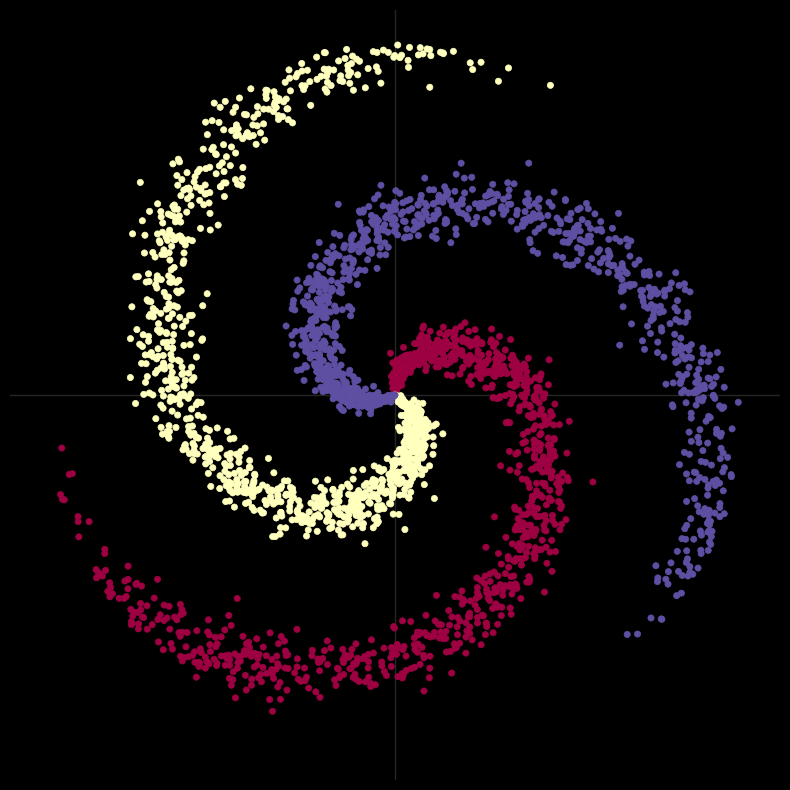

In [19]:
# visualise the data
plot_data(X, y)

## Keras

Keras is a library already built into tf that allows us to easily create neural networks of different architectures. Dense(x) is a dense layer in Nn, i.e. each neuron of layer n-1 is connected to each of layer n and the output layer has x number of nodes. Sequential allows us to connect these layers into a single network. SGD is an optimizer that uses standard stochastic gradient descent, there are many different variants and improvements of SGD. After compiling the model with its optimizer, we can simply call .fit as in sklearn.

In [20]:
learning_rate = 1e-2
W_in = 2  # dimensions
W_hid = 100  # num_hidden_units
W_out = 3  # num_classes
# nn package to create our linear model
# each Linear module has a weight and bias
model = tf.keras.Sequential(
    (tf.keras.layers.Dense(W_in),
     tf.keras.layers.Dense(W_hid),
     tf.keras.layers.Dense(W_out))
)

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = tf.keras.optimizers.SGD(
    learning_rate=learning_rate
)
# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
)
# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0223
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9818
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9488
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9168
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9038
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8579
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8468
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8333
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8195
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8017
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8028
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7728
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8096
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8027
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7649
Epo

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611 (2.39 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

<Sequential name=sequential, built=True>


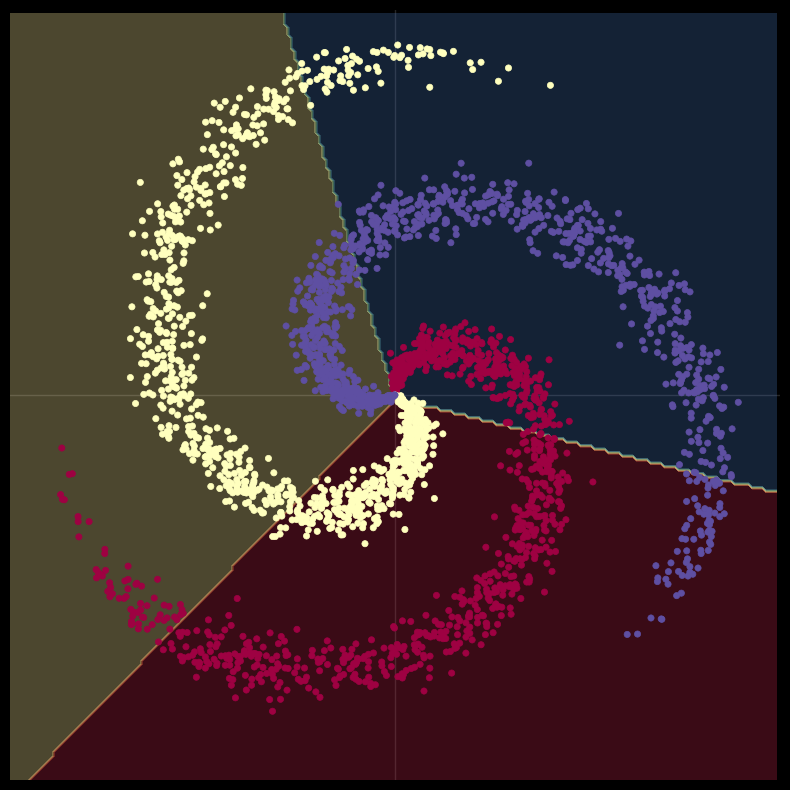

In [22]:
print(model)
plot_model(X, y, model)

### We see that the model cannot handle only linear nodes, let's try adding nonlinear activation functions.

In [23]:
learning_rate = 1e-2
W_in = 2  # dimensions
W_hid = 200  # num_hidden_units
W_out = 3  # num_classes
# nn package to create our linear model
# each Linear module has a weight and bias
model_nonlinear = tf.keras.Sequential(
    (tf.keras.layers.Dense(W_in),
     tf.keras.layers.Dense(W_hid, activation="relu"),
     tf.keras.layers.Dense(W_out))
)

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = tf.keras.optimizers.SGD(
    learning_rate=learning_rate
)
# Compile the model
model_nonlinear.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
)
# Fit the model
model_nonlinear.fit(X, y, epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0955
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0575
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0266
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9972
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9675
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9397
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9091
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8786
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8536
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8380
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8131
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7879
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7716
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7546
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7470
Epoc

In [24]:
model_nonlinear.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,211 (4.73 KB)

 Trainable params: 1,209 (4.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

<Sequential name=sequential_1, built=True>


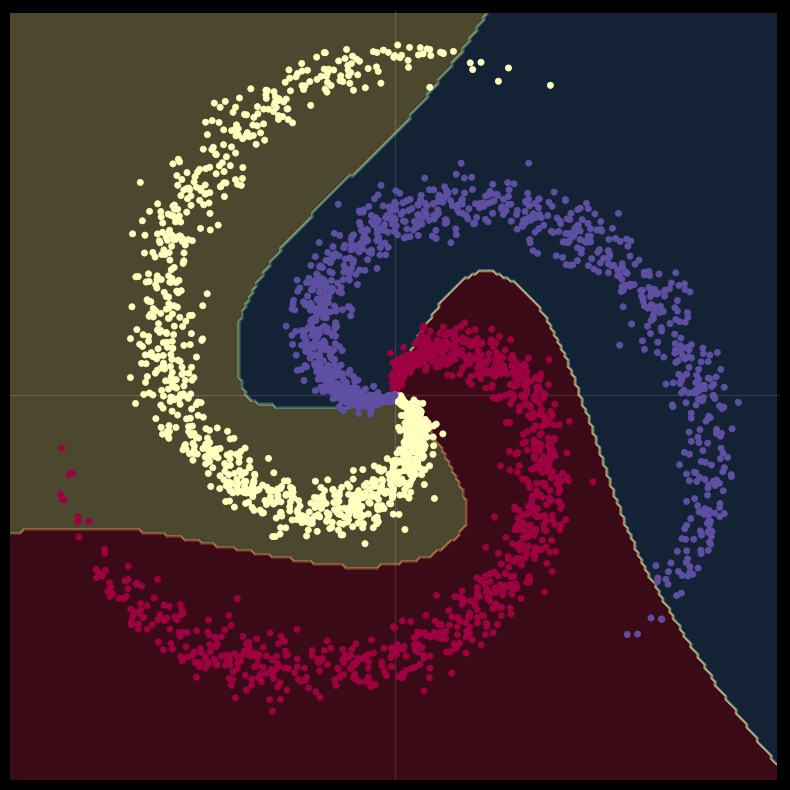

In [25]:
plot_model(X, y, model_nonlinear)
print(model_nonlinear)

One of the main strengths of NNs is that they can handle "unstructured" data such as images.

In [26]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [27]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [28]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

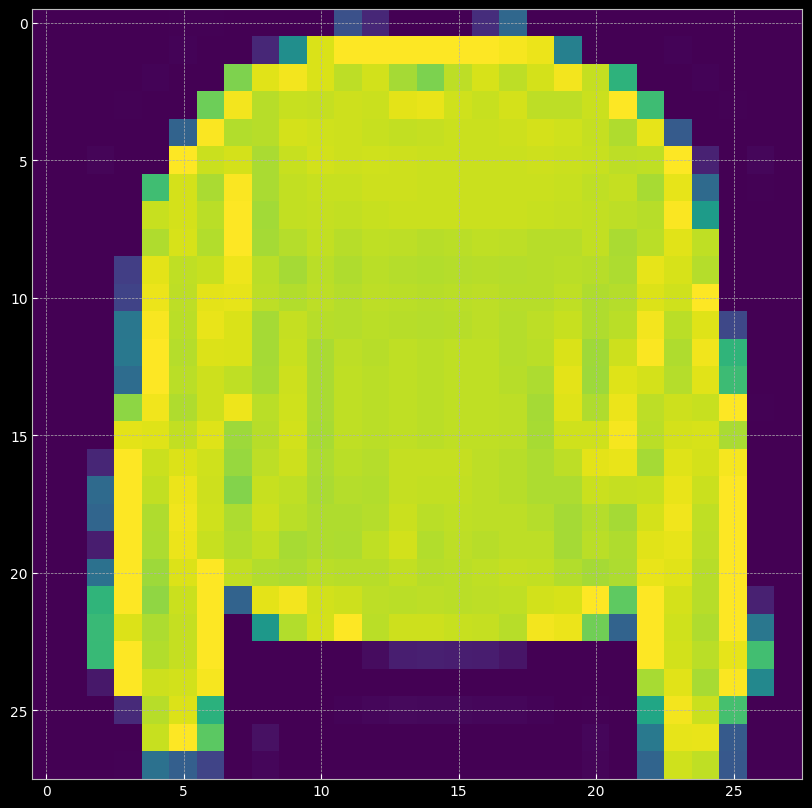

In [29]:
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [30]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

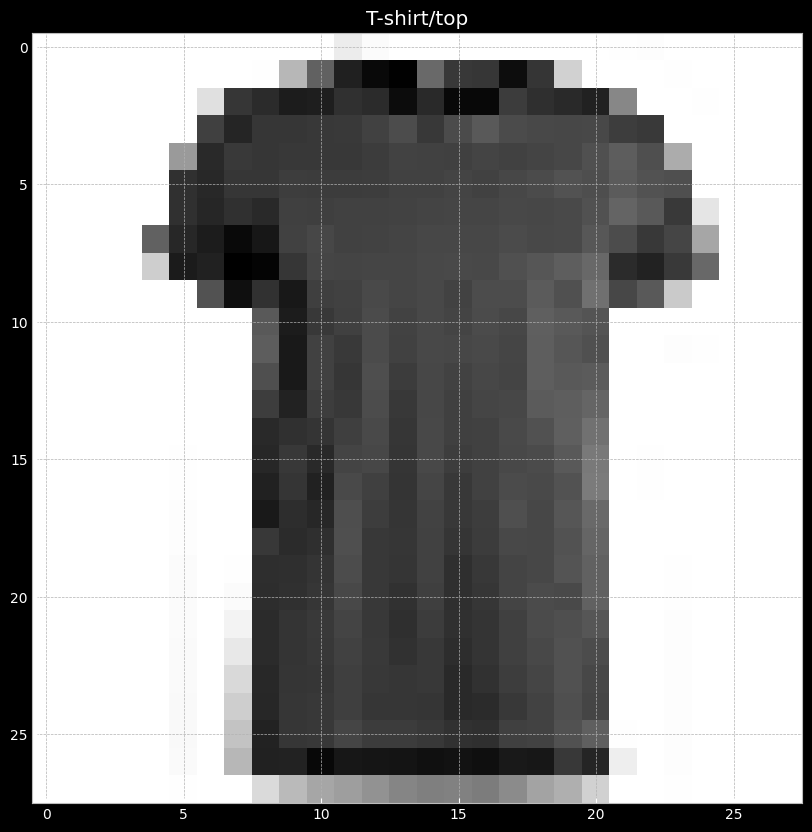

In [31]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)  # change the colours to black & white
plt.title(class_names[train_labels[17]])

### Трабва първо да се оверим, че данните са скалирани.

In [32]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [33]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [34]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model.fit(
    train_data, train_labels, epochs=10, validation_data=(test_data, test_labels)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2950 - loss: 1.8765 - val_accuracy: 0.6230 - val_loss: 1.0823
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6477 - loss: 0.9871 - val_accuracy: 0.7008 - val_loss: 0.8529
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7188 - loss: 0.7969 - val_accuracy: 0.7318 - val_loss: 0.7678
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7548 - loss: 0.7097 - val_accuracy: 0.7618 - val_loss: 0.7047
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7742 - loss: 0.6604 - val_accuracy: 0.7715 - val_loss: 0.6745
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7850 - loss: 0.6356 - val_accuracy: 0.7772 - val_loss: 0.6570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7923 - loss: 0.6126 - val_accuracy: 0.7864 - val_loss: 0.6349
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7997 - loss: 0.5918 - 

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,212 (12.55 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

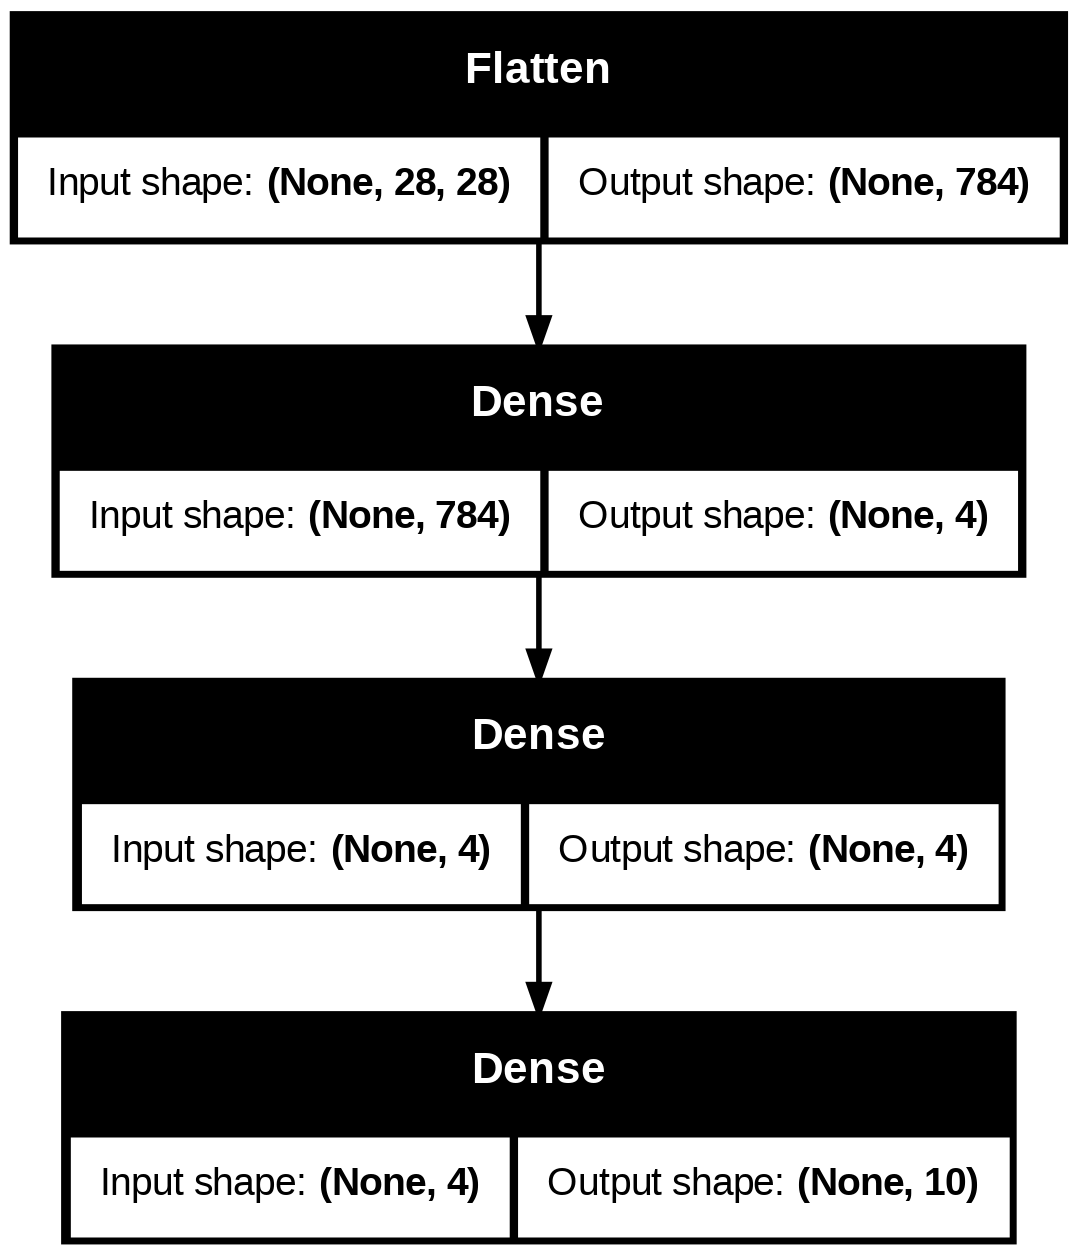

In [36]:
plot_model(model, show_shapes=True)

<Axes: title={'center': 'training history'}>

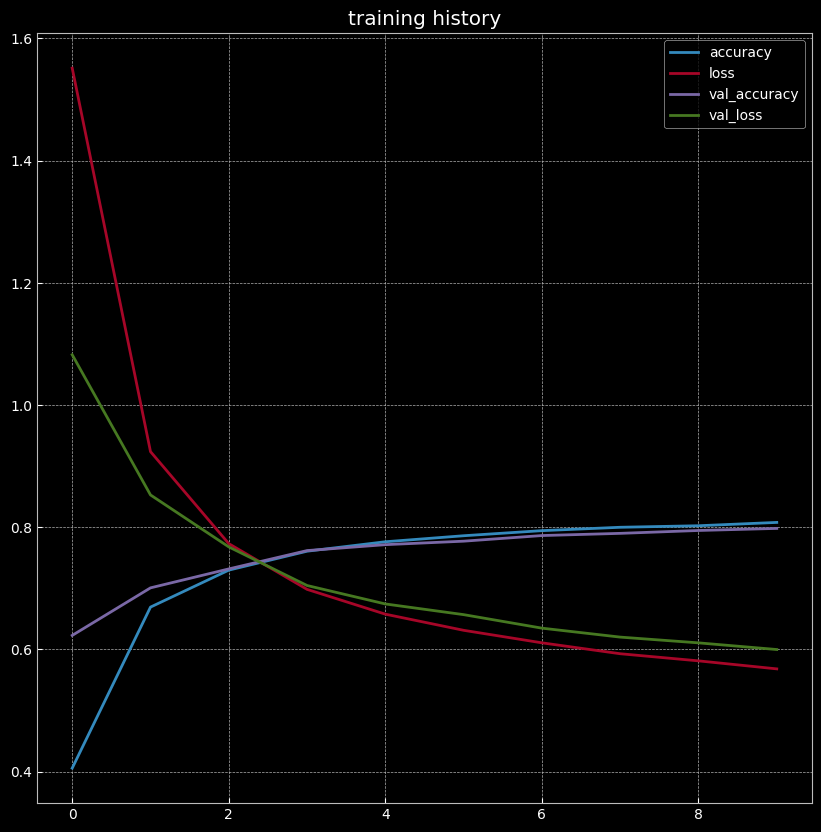

In [37]:
pd.DataFrame(history.history).plot(title="training history")